# Gym Environment

In [1]:
import gym

# Register gym environment. By specifying kwargs,
# you are able to choose which patient or patients to simulate.
# patient_name must be 'adolescent#001' to 'adolescent#010',
# or 'adult#001' to 'adult#010', or 'child#001' to 'child#010'
# It can also be a list of patient names
# You can also specify a custom scenario or a list of custom scenarios
# If you chose a list of patient names or a list of custom scenarios,
# every time the environment is reset, a random patient and scenario will be
# chosen from the list

from gym.envs.registration import register
from simglucose.simulation.scenario import CustomScenario
from datetime import datetime

In [4]:
start_time = datetime(2018, 1, 1, 0, 0, 0)
meal_scenario = CustomScenario(start_time=start_time, scenario=[(1,20)])

register(
    id='simglucose-adolescent2-v0',
    entry_point='simglucose.envs:T1DSimEnv',
    kwargs={'patient_name': 'adolescent#002',
            'custom_scenario': meal_scenario}
)

Error: Cannot re-register id: simglucose-adolescent2-v0

/opt/anaconda3/envs/rl/lib/python3.10/site-packages/gym/envs/registration.py:17: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/opt/anaconda3/envs/rl/lib/python3.10/site-packages/simglucose/patient/t1dpatient.py:260: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 * self.init_state[3], 1.0 * self.init_state[4],
/opt/anaconda3/envs/rl/lib/python3.10/site-packages/simglucose/patient/t1dpatient.py:261: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  1.0 * self.init_state[12]
/opt/anaconda3/envs/rl/lib/python3.10/site-packages

Observation(CGM=160.0789484815703)
[23.75175114]
Observation(CGM=159.9345995029654)
[15.86684759]
Observation(CGM=159.01052211789872)
[17.04133683]
Observation(CGM=156.71721148405436)
[27.76789915]
Observation(CGM=153.27640296105406)
[2.13108175]
Observation(CGM=148.69535355832755)
[2.61387899]
Observation(CGM=142.91906320922072)
[0.60655192]
Observation(CGM=135.96027716005938)
[24.97859537]
Observation(CGM=128.0065364552478)
[23.34470253]
Observation(CGM=119.42473254933877)
[26.10036445]


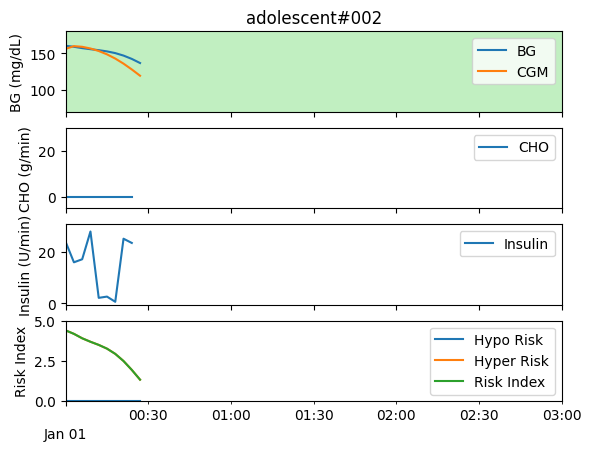

In [5]:
env = gym.make('simglucose-adolescent2-v0')

observation = env.reset()
for t in range(10):
    env.render(mode='human')
    print(observation)
    # Action in the gym environment is a scalar
    # representing the basal insulin, which differs from
    # the regular controller action outside the gym
    # environment (a tuple (basal, bolus)).
    # In the perfect situation, the agent should be able
    # to control the glucose only through basal instead
    # of asking patient to take bolus
    action = env.action_space.sample()
    print(action)
    observation, reward, done, info = env.step(action)
    if done:
        print("Episode finished after {} timesteps".format(t + 1))
        break